<a href="https://colab.research.google.com/github/saadi750/saadi750/blob/main/T5_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd

In [10]:
# Path to the CSV file in your Google Drive
train_path = '/content/drive/MyDrive/FYP/Articles.csv'

# Read the CSV file into a Pandas DataFrame
trainning_df = pd.read_csv(train_path, encoding='ISO-8859-1')

# Drop the 'Date' and 'NewsType' columns
trainning_df = trainning_df.drop(['Date'], axis=1)
trainning_df = trainning_df.drop(['NewsType'], axis=1)

# Rename columns to 'article' and 'highlights'
trainning_df = trainning_df.rename(columns={'Article': 'article', 'Heading': 'highlights'})

# Display the first few rows of the DataFrame
print(trainning_df.head())



                                             article  \
0  KARACHI: The Sindh government has decided to b...   
1  HONG KONG: Asian markets started 2015 on an up...   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...   
3  HONG KONG: Asian markets tumbled Tuesday follo...   
4  NEW YORK: US oil prices Monday slipped below $...   

                                          highlights  
0  sindh govt decides to cut public transport far...  
1                    asia stocks up in new year trad  
2           hong kong stocks open 0.66 percent lower  
3             asian stocks sink euro near nine year   
4                 us oil prices slip below 50 a barr  


In [11]:
MAX_LEN = 512
SUMMARY_LEN = 150
TRAINNING_SIZE = 2692

In [12]:
# Subsetting the training dataset to the first TRAINNING_SIZE examples
trainning_df = trainning_df.iloc[0:TRAINNING_SIZE, :].copy()

# Creating lists for articles and highlights
trainning_article_ls = list(trainning_df['article'])
trainning_highlight_ls = list(trainning_df['highlights'])

# Deleting the original DataFrame to free up memory
del trainning_df

In [13]:
from random import sample

for index in sample(list(np.arange(len(trainning_article_ls))),3):
    print('Original Text : ')
    print(trainning_article_ls[index])

    print('\n\nSummary Text : ')
    print(trainning_highlight_ls[index])

    print('===========================================================================================================\n\n')

Original Text : 
strong>HONG KONG: The dollar tumbled against its major peers in Asia on Monday while regional markets sank in holiday-thinned trade as dealers were spooked by tensions caused by Donald Trump´s divisive immigration ban.</strongA disappointing reading on US economic growth added to the downbeat sentiment with Wall Street ending last week on a negative note.The reality TV star-turned-president on Friday signed an executive order banning travellers from seven Muslim-majority countries that was met with widespread outrage from world leaders and mass global protests."The main focus over the weekend has been Trump´s immigration policy and it won´t necessarily surprise to see some heat coming out of the dollar in early trading," said Chris Weston, Melbourne-based chief market strategist at IG Ltd."Whether the markets start to price in a stronger Trump risk premium is yet to be seen," he told Bloomberg News.In early trade Monday the dollar fell to 114.60 yen from 115.06 yen, wh

In [14]:
print(len(trainning_article_ls))
print(len(trainning_highlight_ls))


2692
2692


In [15]:
df = pd.DataFrame(columns=['target_text','source_text'])
df['target_text'] = trainning_highlight_ls
df['source_text'] = ['summarize: '+item for item in trainning_article_ls]

In [16]:
df.head()

,target_text,source_text
0,sindh govt decides to cut public transport far...,summarize: KARACHI: The Sindh government has d...
1,asia stocks up in new year trad,summarize: HONG KONG: Asian markets started 20...
2,hong kong stocks open 0.66 percent lower,summarize: HONG KONG: Hong Kong shares opened...
3,asian stocks sink euro near nine year,summarize: HONG KONG: Asian markets tumbled Tu...
4,us oil prices slip below 50 a barr,summarize: NEW YORK: US oil prices Monday slip...


In [10]:
!pip install jedi

In [11]:
!pip install kaleido
!pip install python-multipart
!pip install uvicorn
!pip install setuptools
!pip install fastapi



In [12]:
!pip install setuptools

In [ ]:
!pip install --upgrade setuptools

In [1]:
pip show setuptools | grep Version


Version: 69.0.2


In [3]:
!pip install simplet5

In [5]:
!pip install simplet5 -q


In [6]:
from simplet5 import SimpleT5

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [7]:
MAX_EPOCHS = 5

In [17]:
model.train(train_df=df[0:(int)(0.7*TRAINNING_SIZE)],
            eval_df=df[(int)(0.7*TRAINNING_SIZE):TRAINNING_SIZE],
            source_max_token_len=MAX_LEN,
            target_max_token_len=SUMMARY_LEN,
            batch_size=8, max_epochs=MAX_EPOCHS, use_gpu=True)

INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.distributed:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [18]:
import os
model_path = ''
rootdir = 'outputs/'
for it in os.scandir(rootdir):
    if it.is_dir():
        if 'simplet5-epoch-'+(str)(MAX_EPOCHS-1) in it.path:
            model_path = it.path
            print(model_path)

outputs/simplet5-epoch-4-train-loss-1.0709-val-loss-2.6684


In [19]:
model.load_model("t5","./"+model_path, use_gpu=True)

In [20]:
import torch
import json
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

no_tune_model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

device = torch.device('cpu')

In [21]:
from random import sample

for index in sample(list(np.arange(len(trainning_article_ls))),5):
    print('Original Text : ')
    print(trainning_article_ls[index])

    print('\n\nSummary Text : ')
    print(trainning_highlight_ls[index])

    print('\n\nFine tuned Predicted Summary Text : ')
    print(model.predict(trainning_article_ls[index]))

    print('\n\nNot Fine tuned Predicted Summary Text : ')
    preprocess_text = trainning_article_ls[index].strip().replace("\n","")
    t5_prepared_Text = "summarize: "+preprocess_text
    tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)
    summary_ids = no_tune_model.generate(tokenized_text,
                                        num_beams=4,
                                        no_repeat_ngram_size=2,
                                        min_length=30,
                                        max_length=SUMMARY_LEN,
                                        early_stopping=True)
    output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print(output)
    print('===========================================================================================================\n\n')

Token indices sequence length is longer than the specified maximum sequence length for this model (819 > 512). Running this sequence through the model will result in indexing errors


Original Text : 
strong>HONG KONG: The dollar tumbled against its major peers in Asia on Monday while regional markets sank in holiday-thinned trade as dealers were spooked by tensions caused by Donald Trump´s divisive immigration ban.</strongA disappointing reading on US economic growth added to the downbeat sentiment with Wall Street ending last week on a negative note.The reality TV star-turned-president on Friday signed an executive order banning travellers from seven Muslim-majority countries that was met with widespread outrage from world leaders and mass global protests."The main focus over the weekend has been Trump´s immigration policy and it won´t necessarily surprise to see some heat coming out of the dollar in early trading," said Chris Weston, Melbourne-based chief market strategist at IG Ltd."Whether the markets start to price in a stronger Trump risk premium is yet to be seen," he told Bloomberg News.In early trade Monday the dollar fell to 114.60 yen from 115.06 yen, wh

Token indices sequence length is longer than the specified maximum sequence length for this model (821 > 512). Running this sequence through the model will result in indexing errors


['Global backlash to Trump spooked markets sink']


Not Fine tuned Predicted Summary Text : 
the dollar tumbles against its major peers in Asia on Monday. the euro rises to $1.0721 and the pound cries for a return to normalcy in the coming days.


Original Text : 
strong>ISLAMABAD: The International Monetary Fund said on Thursday it had agreed to release a $497 million tranche for Pakistan after the latest review of a bailout package awarded in 2013, though the disbursement still requires IMF board approval.</strongOnce the latest disbursement is made, the IMF will still have to release $1.1 billion of the total $6.7 billion loan agreed three years ago."After constructive discussions, the mission and the Pakistani authorities have reached staff-level agreement on the completion of the tenth review under the EFF (Extended Fund Facility) arrangement," the IMF said in a statement.APP adds: Minister for Finance, Senator Ishaq Dar Thursday said that Pakistan has for the first time successfu

## SCORES

In [22]:
!pip install rouge

In [24]:
import nltk
from rouge import Rouge
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('punkt')

def calculate_scores(original_texts, reference_summaries, predicted_summaries):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(predicted_summaries, reference_summaries, avg=True)

    bleu_scores = []
    for i in range(len(original_texts)):
      bleu_scores.append(corpus_bleu([[reference_summaries[i].split()]], [predicted_summaries[i].split()]))
    bleu_score = sum(bleu_scores) / len(bleu_scores)

    meteor = None
    try:
        meteor_scores = []
        for i in range(len(original_texts)):
            meteor_scores.append(meteor_score([word_tokenize(reference_summaries[i])], predicted_summaries[i].split('.')))
        meteor = sum(meteor_scores) / len(meteor_scores)
    except Exception as e:
        print(f"Error calculating meteor score: {e}")
        meteor = None

    return rouge_scores, bleu_score, meteor


reference_summary = ["Bank of America cut two dozen Asia investment banking jobs"]
generated_summary = ["Bank of America cut two dozen Asia investment banking jobs starting this week"]
original_text = ["Bank of America (BAC.N) is set to cut about two dozen investment banking (IB) jobs in Asia, including some top dealmakers starting this week, according to people familiar with the matter. Some bankers handling clients coverage and deals will be let go, with cuts expected in Hong Kong, Singapore and Japan, BofA's big centres in Asia, the people said, adding that the total number of jobs cuts hasn't been finalised. A Hong Kong-based spokesman for Bank of America declined to comment. Sources declined to be identified as the information is not public. Bank of America's job cut plans comes after Reuters reported on Friday that Goldman Sachs (GS.N) is planning to cut almost 30 percent of its 300 investment banking jobs in Asia outside Japan in response to a slowdown in activity in the region."]

rouge_scores, bleu_score, meteor_score = calculate_scores(original_text, reference_summary, generated_summary)

print('ROUGE scores:', rouge_scores)
print('BLEU score:', bleu_score)
print('METEOR score:', meteor_score)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ROUGE scores: {'rouge-1': {'r': 1.0, 'p': 0.7692307692307693, 'f': 0.8695652124763706}, 'rouge-2': {'r': 1.0, 'p': 0.75, 'f': 0.8571428522448981}, 'rouge-l': {'r': 1.0, 'p': 0.7692307692307693, 'f': 0.8695652124763706}}
BLEU score: 0.7361703354503866
METEOR score: 0.0


In [25]:
import pandas as pd
x = '/content/drive/MyDrive/FYP/Articles.csv'
x = pd.read_csv(train_path, encoding='ISO-8859-1')
x = x.drop(['Date'],axis=1)
x = x.drop(['NewsType'],axis=1)
x = x.rename(columns={'Article': 'article', 'Heading': 'heading'})
x


,article,heading
0,KARACHI: The Sindh government has decided to b...,sindh govt decides to cut public transport far...
1,HONG KONG: Asian markets started 2015 on an up...,asia stocks up in new year trad
2,HONG KONG: Hong Kong shares opened 0.66 perce...,hong kong stocks open 0.66 percent lower
3,HONG KONG: Asian markets tumbled Tuesday follo...,asian stocks sink euro near nine year
4,NEW YORK: US oil prices Monday slipped below $...,us oil prices slip below 50 a barr
...,...,...
2687,strong>DUBAI: Dubai International Airport and ...,Laptop ban hits Dubai for 11m weekend traveller
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",Pak China relations not against any third coun...
2689,strong>WASHINGTON: Uber has grounded its fleet...,Uber grounds self driving cars after accid
2690,strong>BEIJING: The New Development Bank plans...,New Development Bank plans joint investments i...


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

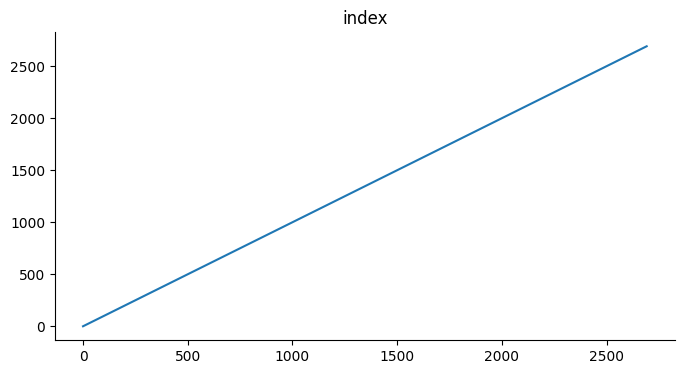

In [40]:
from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

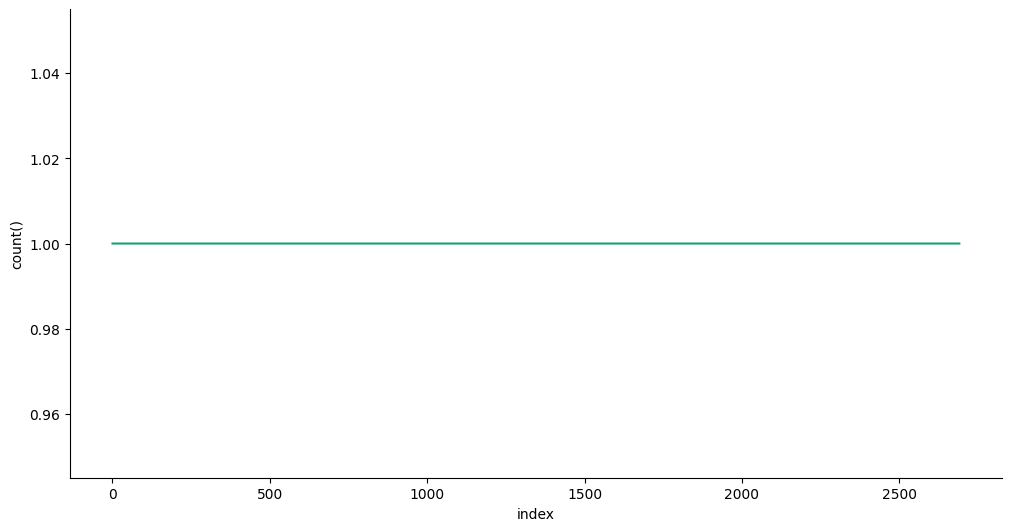

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

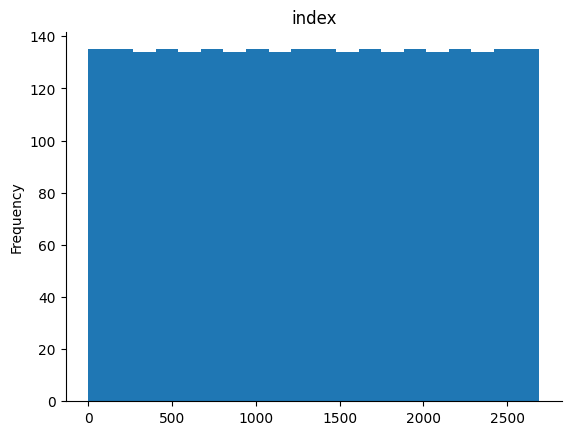

In [36]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)